In [9]:
from torchvision.io.image import read_image
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image

import torchvision.transforms as transforms

import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

<class 'torch.Tensor'>
torch.Size([3, 2160, 15360])


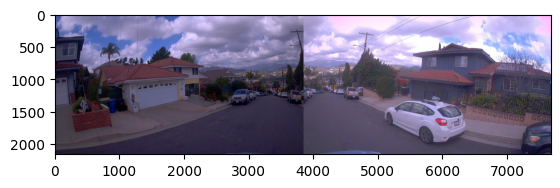

In [10]:
image_path = '/Volumes/JC SSD/SRILab Data/Kaarta/2023-02-11_15-31-02GOOD/images/color_image_256.jpg'

img = read_image(image_path)

plt.imshow(img.permute(1, 2, 0))

# Print type of img
print(type(img))

# Print shape of img
print(img.shape)

# Crop img to middle 50% based on width
img = img[:, :, int(img.shape[2] * 0.25):int(img.shape[2] * 0.75)]

plt.imshow(img.permute(1, 2, 0))

In [11]:
# Step 1: Initialize model with the best available weights
weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.9)
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

/Users/junwonchoi/.local/share/virtualenvs/parked_cars_road_classification-ovyX0Fkz/lib/python3.10/site-packages/torchvision/utils.py:232: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


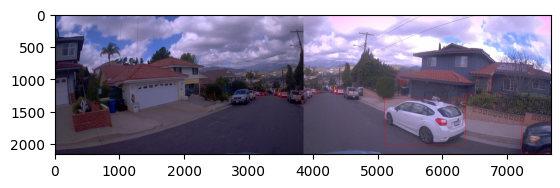

In [12]:
# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = [preprocess(img)]

# Step 4: Use the model and visualize the prediction
prediction = model(batch)[0]
labels = [weights.meta["categories"][i] for i in prediction["labels"]]


# Step 5: Only select cars in the prediction and visualize the prediction
car_indices = [i for i, label in enumerate(labels) if label == "car"]
car_boxes = prediction["boxes"][car_indices]
car_labels = [labels[i] for i in car_indices]
box = draw_bounding_boxes(img, boxes=car_boxes,
                            labels=car_labels,
                            colors="red",
                            width=4, font_size=30)
im = to_pil_image(box.detach())

# im.show()

# Print output using matplotlib
plt.imshow(box.permute(1, 2, 0))


In [13]:
# Get bounding box coordinates
print(prediction["boxes"])

print(prediction["scores"])

print(len(prediction["scores"]))


# Create dataframe with img and bounding box coordinates and number of cars and confidence score
df = pd.DataFrame(columns=['img', 'x1', 'y1', 'x2', 'y2', 'num_cars', 'confidence_score'])

# Fill in dataframe with img and bounding box coordinates and number of cars and confidence score
for i in range(len(prediction["scores"])):
    df.loc[i] = [image_path, float(prediction["boxes"].detach()[i][0]), float(prediction["boxes"].detach()[i][1]), float(prediction["boxes"].detach()[i][2]), float(prediction["boxes"].detach()[i][3]), len(prediction["scores"]), float(prediction["scores"].detach()[i])]

# Print dataframe
df


tensor([[5087.5908, 1300.9553, 6348.8369, 2010.6584],
        [4349.2134, 1155.6465, 4467.7446, 1240.3788],
        [3158.4294, 1211.5748, 3228.7166, 1271.8275],
        [3481.8542, 1202.6531, 3592.7915, 1293.3317],
        [6119.8496, 1273.9274, 6196.8188, 1403.4955],
        [4250.4819, 1167.3802, 4314.8687, 1219.5214],
        [3080.5342, 1198.0884, 3171.9148, 1273.9879],
        [7205.2031, 1650.0499, 7680.0000, 2150.8735],
        [3437.8171, 1208.5376, 3501.5171, 1276.4006],
        [4302.6289, 1162.0118, 4366.0488, 1224.3838],
        [3382.3694, 1211.5631, 3452.0742, 1265.3093],
        [3936.5261, 1154.8092, 4043.3760, 1228.7736],
        [4016.4109, 1171.4316, 4099.2041, 1230.1760],
        [3220.9915, 1212.5682, 3292.2456, 1262.6210],
        [3775.1521, 1181.2451, 3899.4485, 1334.1791]],
       grad_fn=<StackBackward0>)
tensor([0.9994, 0.9901, 0.9849, 0.9814, 0.9771, 0.9705, 0.9662, 0.9577, 0.9417,
        0.9405, 0.9361, 0.9342, 0.9310, 0.9207, 0.9040],
       grad_fn=<Ind

,img,x1,y1,x2,y2,num_cars,confidence_score
0,/Volumes/JC SSD/SRILab Data/Kaarta/2023-02-11_...,5087.590820,1300.955322,6348.836914,2010.658447,15,0.999413
1,/Volumes/JC SSD/SRILab Data/Kaarta/2023-02-11_...,4349.213379,1155.646484,4467.744629,1240.378784,15,0.990106
2,/Volumes/JC SSD/SRILab Data/Kaarta/2023-02-11_...,3158.429443,1211.574829,3228.716553,1271.827515,15,0.984876
3,/Volumes/JC SSD/SRILab Data/Kaarta/2023-02-11_...,3481.854248,1202.653076,3592.791504,1293.331665,15,0.981391
4,/Volumes/JC SSD/SRILab Data/Kaarta/2023-02-11_...,6119.849609,1273.927368,6196.818848,1403.495483,15,0.977104
5,/Volumes/JC SSD/SRILab Data/Kaarta/2023-02-11_...,4250.481934,1167.380249,4314.868652,1219.521362,15,0.970526
6,/Volumes/JC SSD/SRILab Data/Kaarta/2023-02-11_...,3080.534180,1198.088379,3171.914795,1273.987915,15,0.966170
7,/Volumes/JC SSD/SRILab Data/Kaarta/2023-02-11_...,7205.203125,1650.049927,7680.000000,2150.873535,15,0.957654
8,/Volumes/JC SSD/SRILab Data/Kaarta/2023-02-11_...,3437.817139,1208.537598,3501.517090,1276.400635,15,0.941738
9,/Volumes/JC SSD/SRILab Data/Kaarta/2023-02-11_...,4302.628906,1162.011841,4366.048828,1224.383789,15,0.940516
